### Learning material:- 
1. https://realpython.com/python-data-cleaning-numpy-pandas/
2. https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html


### Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
sns.set(font_scale=1.4)
import matplotlib
from matplotlib import pyplot as plt
plt.style.use('seaborn')
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import matplotlib.ticker as tick

## Data Loading

In [2]:
covid_Data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
covid = pd.read_csv(covid_Data_url)
covid.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,29640,30175,30451,30616,30967,31238,31517,31836,32022,32324
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2114,2192,2269,2330,2402,2466,2535,2580,2662,2752
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,12248,12445,12685,12968,13273,13571,13907,14272,14657,15070
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,855
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,197,212,212,259,267,276,284,291,315,328


### How to drop columns in Pandas?

In [3]:
coviddrop = covid.drop(['Lat','Long'],axis = 1)
coviddrop

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,29640,30175,30451,30616,30967,31238,31517,31836,32022,32324
1,NaN,Albania,0,0,0,0,0,0,0,0,...,2114,2192,2269,2330,2402,2466,2535,2580,2662,2752
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,12248,12445,12685,12968,13273,13571,13907,14272,14657,15070
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,855
4,NaN,Angola,0,0,0,0,0,0,0,0,...,197,212,212,259,267,276,284,291,315,328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0,0,0,0,0,0,0,0,...,710,711,712,713,713,713,714,715,717,719
262,NaN,Yemen,0,0,0,0,0,0,0,0,...,1015,1076,1089,1103,1118,1128,1158,1190,1221,1240
263,NaN,Comoros,0,0,0,0,0,0,0,0,...,265,272,272,272,272,272,303,303,303,309
264,NaN,Tajikistan,0,0,0,0,0,0,0,0,...,5630,5691,5747,5799,5849,5900,5900,6005,6058,6058


### Transforming data using Stack

In [4]:
covidUS = covid[covid['Country/Region'] == 'US']
covidLatLong = covidUS.drop(['Lat','Long'],axis = 1)
Covidtranform = covidLatLong.stack()
CovidtranformF = Covidtranform.reset_index()
CovidtranformF

,level_0,level_1,0
0,225,Country/Region,US
1,225,1/22/20,1
2,225,1/23/20,1
3,225,1/24/20,2
4,225,1/25/20,2
...,...,...,...
160,225,6/29/20,2590668
161,225,6/30/20,2636414
162,225,7/1/20,2687588
163,225,7/2/20,2742049


### Renaming Columns


In [5]:
CovidtranformF = CovidtranformF[CovidtranformF['level_1'] != 'Country/Region']
CovidtranformFilter = CovidtranformF[['level_1',0]]
CovidtranformFilter.columns = ['Date','No of Cases']
CovidtranformFilter = CovidtranformFilter.sort_values(by = 'No of Cases',ascending = False)
CovidtranformFilter

,Date,No of Cases
164,7/3/20,2794153
163,7/2/20,2742049
162,7/1/20,2687588
161,6/30/20,2636414
160,6/29/20,2590668
...,...,...
6,1/27/20,5
3,1/24/20,2
4,1/25/20,2
2,1/23/20,1


### Sorting data

In [6]:
Covidsort = CovidtranformFilter.sort_values(by = 'No of Cases',ascending = False)
Covidsort

,Date,No of Cases
164,7/3/20,2794153
163,7/2/20,2742049
162,7/1/20,2687588
161,6/30/20,2636414
160,6/29/20,2590668
...,...,...
6,1/27/20,5
3,1/24/20,2
4,1/25/20,2
2,1/23/20,1


### Selecting 4 countries that has highest number of cases

In [7]:
covidMelt = coviddrop.melt(id_vars = ['Country/Region'])
coviddropNan = covidMelt.dropna()
coviddropvariable = coviddropNan[coviddropNan['variable'] != 'Province/State']
covidtopCountries = coviddropvariable.groupby(['Country/Region'])['value'].sum().reset_index().sort_values(by = 'value',ascending = False)
covidtopCountries[0:5] 

,Country/Region,value
174,US,139207807
23,Brazil,41675837
140,Russia,27477044
158,Spain,21163626
85,Italy,20895264


### Selecting 4 countries

In [8]:
Covidtop4countries = coviddropvariable.loc[coviddropvariable['Country/Region'].isin(['US','Brazil','Russia','Spain'])]
set(Covidtop4countries['Country/Region'])

{'Brazil', 'Russia', 'Spain', 'US'}

### Renaming Columns, Parsing date and grouping data

In [9]:
import numpy as np
pd.set_option('mode.chained_assignment',None)
Covidtop4countries.columns = ['Country','Date','No of Cases']
Covidtop4countries['Date'] = pd.to_datetime(Covidtop4countries.Date)
Covidtop4countriesGroup = Covidtop4countries.groupby(['Country',pd.Grouper(key = 'Date', freq = 'SM')])['No of Cases'].sum().reset_index().sort_values('Date')
Covidtop4countriesGroup
Covidtop4countriesGroup1 = Covidtop4countriesGroup[Covidtop4countriesGroup['Date'] < '2020-06-30']
Covidtop4countriesGroup1
Covidtop4countriesGroup1['Parsed Date'] = Covidtop4countriesGroup1['Date'].astype(str)
Covidtop4countriesGroup1['Parsed Date'] =  Covidtop4countriesGroup1['Parsed Date'].str[6:]
Covidtop4countriesGroup1['Parsed Date'] = Covidtop4countriesGroup1['Parsed Date'].replace({'-':'/'}, regex=True)
Covidtop4countriesGroup1[0:10]

,Country,Date,No of Cases,Parsed Date
0,Brazil,2020-01-15,0,1/15
24,Spain,2020-01-15,0,1/15
36,US,2020-01-15,31,1/15
12,Russia,2020-01-15,0,1/15
1,Brazil,2020-01-31,0,1/31
25,Spain,2020-01-31,20,1/31
13,Russia,2020-01-31,30,1/31
37,US,2020-01-31,161,1/31
26,Spain,2020-02-15,86,2/15
38,US,2020-02-15,200,2/15


### Data Visualisation 

Learning material:-

1. https://www.datasciencelearner.com/create-a-dictionary-in-python/#:~:text=%20How%20to%20Create%20a%20Dictionary%20in%20Python%3A,3%20Other%20Tweaks%20and%20Examples.%20%20More%20
2. http://www.learningaboutelectronics.com/Articles/How-to-create-subplots-in-matplotlib-with-Python.php#:~:text=A%20subplot%20is%20when%20the%20graph%20is%20broken,the%20number%20you%20want%20in%20rows%20and%20columns. 


### Making beautiful visualization

In [10]:
#Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
def reformat_large_tick_values(tick_val, pos):

    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}Billion'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}Million'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

<function matplotlib.pyplot.show(*args, **kw)>

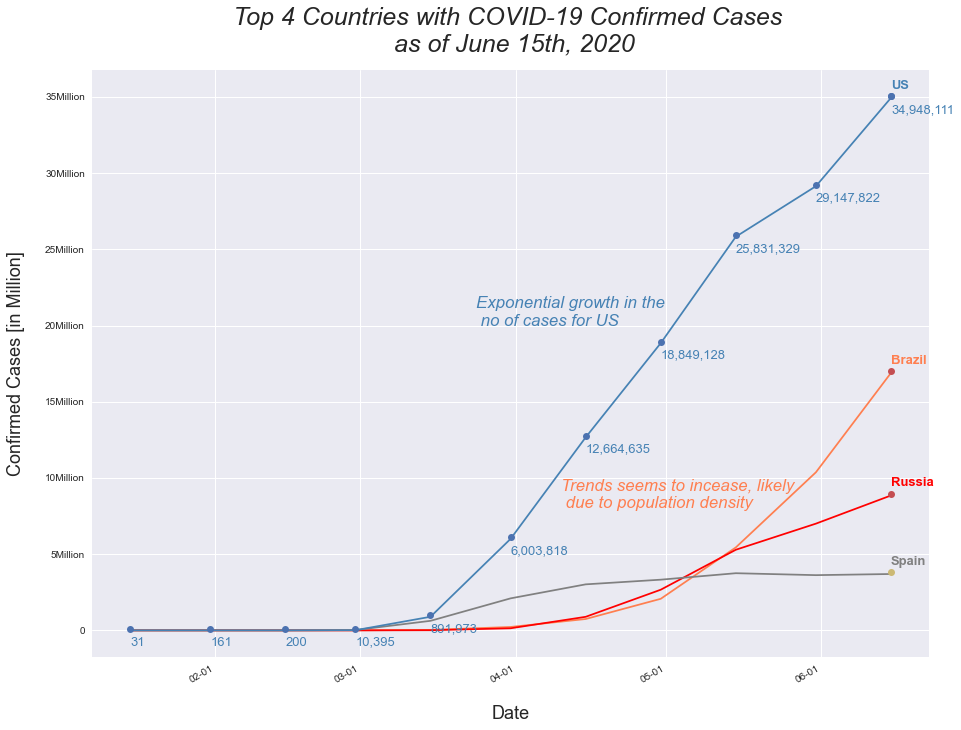

In [11]:
# Definning dictionary
color = {'Brazil':'coral','Russia':'red','Spain':'gray','US':'steelblue'}
color

# Creating subplots
fig,ax = plt.subplots(figsize = (15,12))

for label,df in Covidtop4countriesGroup1.groupby(['Country']):
        df.plot(kind = 'line',x = 'Date', y = 'No of Cases',ax =ax,label = label, color = color[label])

# Formating Y axis
plt.ticklabel_format(style = 'plain',axis = 'y')


# Define colors
color_annotation = {'Brazil':'ro','Russia':'ro','Spain':'yo','US':'bo'}
color_annotation

# Picking maximum point to annotate the coordinates
CovidFinalMax = Covidtop4countriesGroup1.groupby(['Country'])['Date'].transform(max) == Covidtop4countriesGroup1['Date']
CovidFinal = Covidtop4countriesGroup1[CovidFinalMax]
CovidFinal

# adding same line color and text color
for Country,date,Cases,parseddate in zip(CovidFinal['Country'],CovidFinal['Date'],CovidFinal['No of Cases'],CovidFinal['Parsed Date']):
        xmax = pd.to_datetime(date)
        ymax = Cases
        ax.plot(xmax,ymax+100000,color_annotation[Country])
        ax.text(xmax,ymax+600000,Country,color = color[Country],fontsize = 13,fontweight='bold')
 

# Selecting one countries and adding information in the chart
CovidUS = Covidtop4countriesGroup1[Covidtop4countriesGroup1['Country'] == 'US']
for Country,date,Cases,parseddate,case1 in zip(CovidUS['Country'],CovidUS['Date'],CovidUS['No of Cases'],CovidUS['Parsed Date'],CovidUS['No of Cases'].apply(lambda x : "{:,}".format(x))):
        xmax = pd.to_datetime(date)
        ymax = Cases
        ax.plot(xmax,ymax+100000,color_annotation[Country])
        ax.text(xmax,ymax-800000,case1,color = color[Country],fontsize = 13,va = 'center')

# Position of text field
xcord = pd.to_datetime('2020-03-24')
ax.annotate("Exponential growth in the\n no of cases for US", xy=(xcord, 20000000),
            xytext=(xcord, 20000000),color='steelblue',style='italic')

# Position of text field
xcord = pd.to_datetime('2020-04-10')
ax.annotate("Trends seems to incease, likely \n due to population density", xy=(xcord, 8000000),
            xytext=(xcord, 8000000),color='coral',style='italic')

# Removing legend from left side
ax.get_legend().remove()

# Formating date in x axis
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))

# setting grid as true
ax.grid(True)


# Adding title
plt.title('Top 4 Countries with COVID-19 Confirmed Cases \n as of June 15th, 2020',y=1.02, fontsize =25,style='italic')
plt.ylabel('Confirmed Cases [in Million]', labelpad =20, fontsize =18)
plt.xlabel('Date', labelpad =20, fontsize =18)
plt.show


## Ploting graph using Plotly library

In [13]:
import plotly 
import plotly.graph_objects as go

x_axis = CovidUS['Date']
y_axix = CovidUS['No of Cases']

figure = go.Figure(
      data = [go.Scatter(x=x_axis,y=y_axix,mode = "lines+markers+text",name = "Lines, Markers and Text",text = y_axix,line = dict(color = 'black'),
                        textposition = "top center")  ],
      layout = {"title":"COVID 19 trend for US",
                "xaxis":{"title":"Date"},
                 "yaxis":{"title":"COnfirmed Cases"}
               },


)
figure.show()

## COVID 19 daily trend using Plotly

In [17]:
Covidsort1 = Covidsort.sort_values(by = 'Date',ascending =  True)
Covidsort1

import plotly 
import plotly.graph_objects as go

x_axis = pd.to_datetime(Covidsort1['Date'])
y_axis = Covidsort1['No of Cases']

y_min = y_axis.min()
y_max = y_axis.max()

# Looping frame to create animation
frame1 = []
for frame in range(0,len(x_axis)):
    x_axis_frame = list(x_axis[0:frame])
    y_axis_frame = list(y_axis[0:frame])
    curr_frame = go.Frame(data = [go.Scatter(x= x_axis_frame, y = y_axis_frame,mode = "lines+text",name="Lines and Text",line = dict(color='black'),
                                            textposition="top center")])
    frame1.append(curr_frame)

# Defining main frame to create animation
figure = go.Figure(
      data = [go.Scatter(x=['2020-01-22'],y=[1],mode = "lines",line = dict(color = 'black'),
                        textposition = "top center")  ],
      layout = {"title":"Daily Running COVID 19 trend for US",
                "updatemenus":[{"type":"buttons","buttons":[
                {"method":"animate","label":"play", "args":[None]}
            ]}],
                "xaxis":{"title":"Date","range":['2020-01-22','2020-07-01']},
                 "yaxis":{"title":"COnfirmed Cases","range":[y_min,y_max] }
               },
frames = frame1
)

figure.show()
    